# Import Libraries:
This section imports all required Python libraries for data processing, text cleaning, visualization, and building machine learning or deep learning sentiment models. It sets up the environment so later code cells can run properly.

In [1]:
import pandas as pd

import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [45]:
import os
os.environ["PYTHONHASHSEED"] = "42"
os.environ["TF_DETERMINISTIC_OPS"] = "1"

import random
import numpy as np
import tensorflow as tf

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


# Drive Dataset & Load Dataset:

This part connects Google Colab to Google Drive to access datasets stored there. Once Drive is mounted, the code loads the sentiment dataset from a CSV file into a Pandas DataFrame for further analysis.

In [2]:
from types import DynamicClassAttribute
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/MLL_Project/Sentiment_T.csv")


# Details Of Dataset:

This section examines the structure of the dataset. It displays sample rows, summary statistics, and unique values of each column. It helps you understand the data format, distribution, and potential preprocessing requirements.

In [4]:
df.head()

,Unnamed: 0,channel,id,text,date,views,scores,compound,sentiment_type
0,0,binancesignals,1382,bitcoin market cap surpasses 13 trillion,2024-03-04 15:33:04+00:00,6319.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
1,1,binancesignals,1381,update atausdt long leverage cross x10 smashed...,2024-03-04 10:48:51+00:00,6847.0,"{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'comp...",0.5106,POSITIVE
2,2,binancesignals,1380,altcoins started make move bitcoin total marke...,2024-03-03 18:53:52+00:00,8066.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
3,3,binancesignals,1379,coin maticusdt timeframe 1d observation broken...,2024-03-03 16:52:07+00:00,7740.0,"{'neg': 0.129, 'neu': 0.871, 'pos': 0.0, 'comp...",-0.4767,NEGATIVE
4,4,binancesignals,1378,coin aptusdt timeframe 1d observation broken m...,2024-03-03 16:50:49+00:00,7668.0,"{'neg': 0.154, 'neu': 0.846, 'pos': 0.0, 'comp...",-0.4767,NEGATIVE


In [5]:
df.describe()

,Unnamed: 0,id,views,compound
count,14712.000000,14712.000000,14712.000000,14712.000000
mean,7695.078915,5731.983415,14737.631525,0.323880
std,4430.002318,3185.394956,12069.131738,0.468967
min,0.000000,7.000000,39.000000,-0.956500
25%,3825.750000,2620.500000,7513.750000,0.000000
50%,7702.500000,6559.000000,11528.000000,0.440400
75%,11527.250000,8412.000000,21654.250000,0.765000
max,15358.000000,10554.000000,375298.000000,0.995800


In [6]:
df.nunique()

,0
Unnamed: 0,14712
channel,7
id,8960
text,10226
date,13410
views,8451
scores,5511
compound,732
sentiment_type,3


In [7]:
print("🔹 First 5 rows:")
print(df.head())

🔹 First 5 rows:
   Unnamed: 0         channel    id  \
0           0  binancesignals  1382   
1           1  binancesignals  1381   
2           2  binancesignals  1380   
3           3  binancesignals  1379   
4           4  binancesignals  1378   

                                                text  \
0           bitcoin market cap surpasses 13 trillion   
1  update atausdt long leverage cross x10 smashed...   
2  altcoins started make move bitcoin total marke...   
3  coin maticusdt timeframe 1d observation broken...   
4  coin aptusdt timeframe 1d observation broken m...   

                        date   views  \
0  2024-03-04 15:33:04+00:00  6319.0   
1  2024-03-04 10:48:51+00:00  6847.0   
2  2024-03-03 18:53:52+00:00  8066.0   
3  2024-03-03 16:52:07+00:00  7740.0   
4  2024-03-03 16:50:49+00:00  7668.0   

                                              scores  compound sentiment_type  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000        NEUTRAL  
1  {'neg': 

In [8]:
# View column names (features)
print("\n🔹 Column names:")
print(df.columns)



🔹 Column names:
Index(['Unnamed: 0', 'channel', 'id', 'text', 'date', 'views', 'scores',
       'compound', 'sentiment_type'],
      dtype='object')


In [9]:
# View rows, columns
print("\n🔹 Dataset shape:")
print(df.shape)



🔹 Dataset shape:
(14712, 9)


In [10]:
# View data types of each column
print("\n🔹 Data types:")
print(df.dtypes)



🔹 Data types:
Unnamed: 0          int64
channel            object
id                  int64
text               object
date               object
views             float64
scores             object
compound          float64
sentiment_type     object
dtype: object


In [11]:
# Check missing values
print("\n🔹 Missing values:")
print(df.isnull().sum())


🔹 Missing values:
Unnamed: 0         0
channel            0
id                 0
text              30
date               0
views              0
scores             0
compound           0
sentiment_type     0
dtype: int64


In [12]:

# View unique
print("\n🔹 Unique sentiment labels:")
print(df['sentiment_type'].unique())


🔹 Unique sentiment labels:
['NEUTRAL' 'POSITIVE' 'NEGATIVE']


# Distribution Chart of Sentiments Lables:



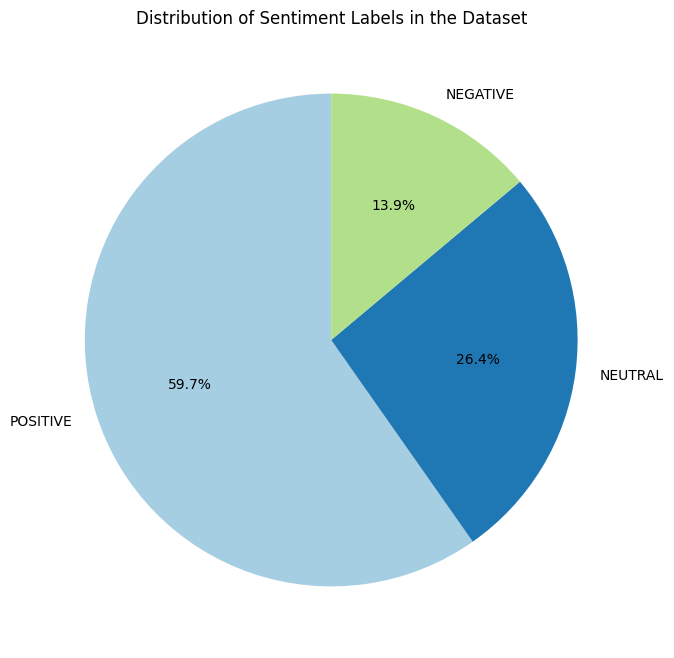

In [13]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Sentiment Labels in the Dataset')
plt.ylabel('')
plt.show()

# Pre-Processing;

This section cleans and prepares the text by applying operations such as lowercasing, removing punctuation, removing stopwords, tokenizing, and converting text into a model-ready format. Preprocessing ensures higher accuracy in machine learning models.


In [14]:
import nltk
from nltk.corpus import stopwords
import re

# 1. basic cleanup
def clean_label(s):
    s = str(s).strip()            # remove whitespace
    s = re.sub(r'\s+', ' ', s)   # collapse multiple spaces
    s = s.lower()
    return s

# Download stopwords
try:
    stopwords_set = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stopwords_set = set(stopwords.words('english'))

def clean_text_data(text):
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove emojis
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)
    text = re.sub(r'[^\w\s]', '', text) # Keep letters, numbers, underscore, space
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords_set]
    text = ' '.join(filtered_words)

    return text

# Apply to 'Text' column
df['cleaned_text'] = df['text'].apply(clean_text_data)
print(df[['text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                text  \
0           bitcoin market cap surpasses 13 trillion   
1  update atausdt long leverage cross x10 smashed...   
2  altcoins started make move bitcoin total marke...   
3  coin maticusdt timeframe 1d observation broken...   
4  coin aptusdt timeframe 1d observation broken m...   

                                        cleaned_text  
0              bitcoin market cap surpasses trillion  
1  update atausdt long leverage cross x smashed s...  
2  altcoins started make move bitcoin total marke...  
3  coin maticusdt timeframe observation broken ma...  
4  coin aptusdt timeframe observation broken majo...  


In [15]:

df['Sentiment_clean'] = df['sentiment_type'].apply(clean_label)

# Mapping Labels

In [16]:
# 2. mapping to consolidated labels
mapping = {
    # positives
    'positive': 'positive', 'happy': 'positive', 'happiness': 'positive', 'joy': 'positive',
    'gratitude': 'positive','grateful':'positive','hope':'positive','optimism':'positive',
    'contentment':'positive','serenity':'positive','inspiration':'positive','amusement':'positive',
    'love':'positive','admiration':'positive','affection':'positive','encouragement':'positive',

    # negatives
    'negative': 'negative','sad':'negative','sadness':'negative','grief':'negative','despair':'negative',
    'anger':'anger','frustration':'negative','frustrated':'negative','hate':'negative','resentment':'negative',
    'disgust':'negative','boredom':'negative','loneliness':'negative','regret':'negative','helplessness':'negative',

    # fear
    'fear':'fear','anxiety':'fear','anxious':'fear','intimidation':'fear','apprehensive':'fear','overwhelmed':'fear',

    # neutral
    'neutral':'neutral','indifference':'neutral',

    # other specific mapping examples
    'excited':'positive','excitement':'positive','euphoria':'positive',
    # Add many more synonyms here based on your long list...
}

def map_label(s):
    if s in mapping:
        return mapping[s]
    # heuristic rules
    if 'joy' in s or 'happy' in s or 'happiness' in s or 'bless' in s:
        return 'positive'
    if 'sad' in s or 'grief' in s or 'heartbreak' in s:
        return 'negative'
    if 'anger' in s or 'frustr' in s or 'hate' in s:
        return 'anger'
    if 'fear' in s or 'anxi' in s or 'intimid' in s:
        return 'fear'
    if 'neutral' in s:
        return 'neutral'
    # fallback
    return 'other'


In [17]:
df['label'] = df['Sentiment_clean'].apply(map_label)

In [18]:
print(df['label'].value_counts())

label
positive    8789
neutral     3879
negative    2044
Name: count, dtype: int64


# Tokenization and Padding


In [19]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

texts = df['text'].astype(str).tolist()
labels = df['label'].tolist()

# tokenizer
MAX_NUM_WORDS = 20000
MAX_SEQ_LEN = 120

In [20]:
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post', truncating='post')

In [21]:
# labels -> integers
le = LabelEncoder()
y = le.fit_transform(labels)
num_classes = len(le.classes_)

In [22]:
# train/val/test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print("Classes:", le.classes_)
print("Train/Val/Test sizes:", X_train.shape, X_val.shape, X_test.shape)

Classes: ['negative' 'neutral' 'positive']
Train/Val/Test sizes: (10298, 120) (2207, 120) (2207, 120)


In [23]:

EMBED_DIM = 128

y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)


# Apply Early Stopping

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
cw = {i: class_weights[i] for i in range(len(class_weights))}

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mc = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Base model(ML): Naive Bayes

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Vectorize
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'].fillna(''))
y = df['label'].to_numpy()

from sklearn.model_selection import train_test_split
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = MultinomialNB()
nb_model.fit(X_train_nb, y_train_nb)

y_pred_nb = nb_model.predict(X_test_nb)
print("🔹 Naive Bayes Accuracy:", accuracy_score(y_test_nb, y_pred_nb))
print("\n🔹 Classification Report (NB):\n")
print(classification_report(y_test_nb, y_pred_nb))


🔹 Naive Bayes Accuracy: 0.8022426095820592

🔹 Classification Report (NB):

              precision    recall  f1-score   support

    negative       0.49      0.80      0.61       408
     neutral       0.92      0.74      0.82       771
    positive       0.88      0.83      0.86      1764

    accuracy                           0.80      2943
   macro avg       0.76      0.79      0.76      2943
weighted avg       0.84      0.80      0.81      2943



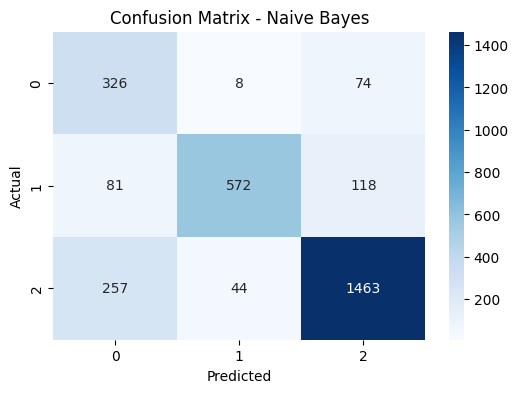

In [26]:
cm = confusion_matrix(y_test_nb, y_pred_nb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Base model(ML): Logistic Regression Model


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['text'].fillna(''))
y = df['label']

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_lr, y_train_lr)
y_pred_lr = lr_model.predict(X_test_lr)


print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test_lr, y_pred_lr))
print("\n🔹 Classification Report (LR):\n")
print(classification_report(y_test_lr, y_pred_lr))


🔹 Logistic Regression Accuracy: 0.926605504587156

🔹 Classification Report (LR):

              precision    recall  f1-score   support

    negative       0.93      0.75      0.83       408
     neutral       0.92      0.92      0.92       771
    positive       0.93      0.97      0.95      1764

    accuracy                           0.93      2943
   macro avg       0.93      0.88      0.90      2943
weighted avg       0.93      0.93      0.92      2943



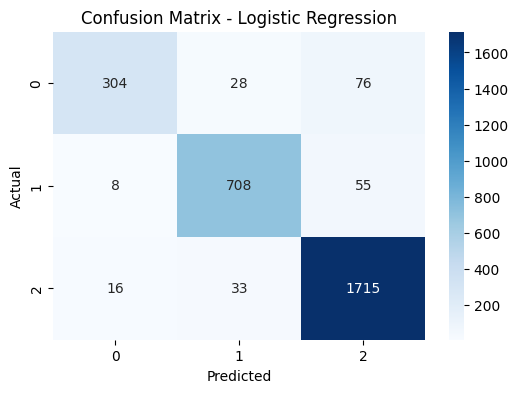

In [28]:
cm = confusion_matrix(y_test_lr, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **Apply Deep Learning Models
**

# RNN Model


In [29]:
def build_rnn():
    model = Sequential([
        Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBED_DIM, input_length=MAX_SEQ_LEN),
        SimpleRNN(128, return_sequences=False),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy'])
    return model

    # Train RNN
model_rnn = build_rnn()
history_rnn = model_rnn.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=20, batch_size=32,
    class_weight=cw,
    callbacks=[es, mc]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.3731 - loss: 1.1505

322/322 ━━━━━━━━━━━━━━━━━━━━ 33s 92ms/step - accuracy: 0.3730 - loss: 1.1506 - val_accuracy: 0.2347 - val_loss: 1.1547
Epoch 2/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.3249 - loss: 1.1535

322/322 ━━━━━━━━━━━━━━━━━━━━ 30s 92ms/step - accuracy: 0.3249 - loss: 1.1535 - val_accuracy: 0.3045 - val_loss: 1.0514
Epoch 3/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - accuracy: 0.3178 - loss: 1.1053 - val_accuracy: 0.3163 - val_loss: 1.0612
Epoch 4/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.3522 - loss: 1.0882 - val_accuracy: 0.3611 - val_loss: 1.0542
Epoch 5/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.3578 - loss: 1.0628 - val_accuracy: 0.1731 - val_loss: 1.1459
Epoch 6/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step - accuracy: 0.2908 - loss: 1.0773 - val_accuracy: 0.2913 - val_loss: 1.0817
Epoch 7/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step - accuracy: 0.3082 - loss: 1.0384 - val_accuracy: 0.2406 - val_loss: 1.0577


In [30]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

def get_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted"
    )
    return acc, precision, recall, f1

pred_rnn = np.argmax(model_rnn.predict(X_test), axis=1)
rnn_acc, rnn_precision, rnn_recall, rnn_f1 = get_metrics(y_test, pred_rnn)

print("RNN Model Metrics")
print(f"Accuracy:  {rnn_acc:.4f}")
print(f"Precision: {rnn_precision:.4f}")
print(f"Recall:    {rnn_recall:.4f}")
print(f"F1 Score:  {rnn_f1:.4f}")


69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
RNN Model Metrics
Accuracy:  0.2986
Precision: 0.4452
Recall:    0.2986
F1 Score:  0.2844


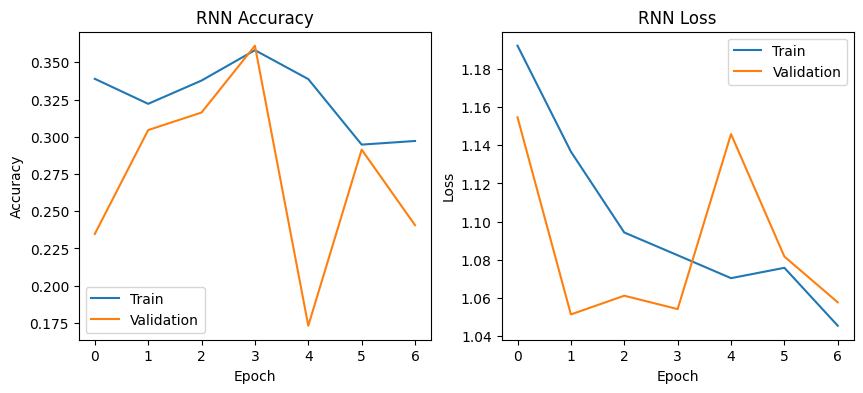

In [42]:
# =========================================
# 🔹 RNN Accuracy & Loss Curve
# =========================================

plt.figure(figsize=(10,4))

# Accuracy Curve
plt.subplot(1,2,1)
plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title("RNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'])

# Loss Curve
plt.subplot(1,2,2)
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title("RNN Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'])

plt.show()


# LSTM Model

In [31]:
def build_lstm():
    model = Sequential([
        Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBED_DIM, input_length=MAX_SEQ_LEN),
        Bidirectional(LSTM(128, return_sequences=False)),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy'])
    return model

# Train LSTM
model_lstm = build_lstm()
history_lstm = model_lstm.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=5, batch_size=32,
    class_weight=cw,
    callbacks=[es, mc]
)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.6980 - loss: 0.7165

322/322 ━━━━━━━━━━━━━━━━━━━━ 157s 475ms/step - accuracy: 0.6983 - loss: 0.7158 - val_accuracy: 0.9130 - val_loss: 0.2380
Epoch 2/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.9427 - loss: 0.1776

322/322 ━━━━━━━━━━━━━━━━━━━━ 153s 474ms/step - accuracy: 0.9427 - loss: 0.1776 - val_accuracy: 0.9320 - val_loss: 0.1984
Epoch 3/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 158s 491ms/step - accuracy: 0.9824 - loss: 0.0668 - val_accuracy: 0.9348 - val_loss: 0.2123
Epoch 4/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 152s 474ms/step - accuracy: 0.9893 - loss: 0.0403 - val_accuracy: 0.9193 - val_loss: 0.3041
Epoch 5/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 154s 477ms/step - accuracy: 0.9923 - loss: 0.0278 - val_accuracy: 0.9039 - val_loss: 0.3801


In [32]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

def get_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted"
    )
    return acc, precision, recall, f1

pred_lstm = np.argmax(model_lstm.predict(X_test), axis=1)
lstm_acc, lstm_precision, lstm_recall, lstm_f1 = get_metrics(y_test, pred_lstm)

print("LSTM Model Metrics")
print(f"Accuracy:  {lstm_acc:.4f}")
print(f"Precision: {lstm_precision:.4f}")
print(f"Recall:    {lstm_recall:.4f}")
print(f"F1 Score:  {lstm_f1:.4f}")

69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step
LSTM Model Metrics
Accuracy:  0.9275
Precision: 0.9266
Recall:    0.9275
F1 Score:  0.9270


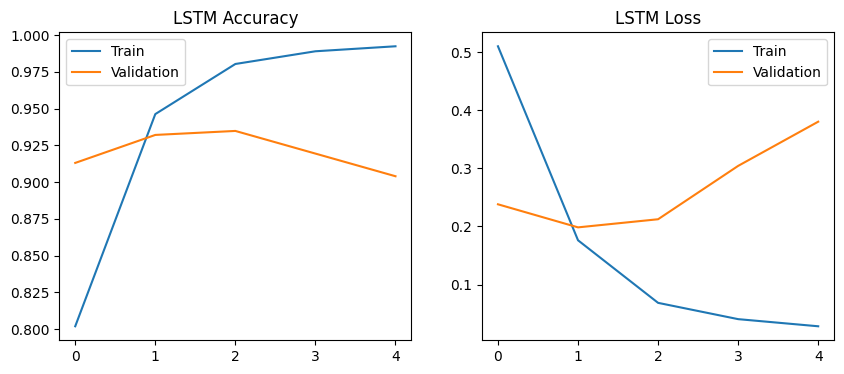

In [43]:
# =========================================
# 🔹 LSTM Accuracy & Loss Curve
# =========================================

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title("LSTM Accuracy")
plt.legend(['Train', 'Validation'])

plt.subplot(1,2,2)
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title("LSTM Loss")
plt.legend(['Train', 'Validation'])

plt.show()


# GRU Model


In [33]:
def build_gru():
    model = Sequential([
        Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBED_DIM, input_length=MAX_SEQ_LEN),
        Bidirectional(GRU(128, return_sequences=False)),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy'])
    return model

# Train GRU
model_gru = build_gru()
history_gru = model_gru.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=20, batch_size=32,
    class_weight=cw,
    callbacks=[es, mc]
)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


322/322 ━━━━━━━━━━━━━━━━━━━━ 134s 398ms/step - accuracy: 0.6902 - loss: 0.6751 - val_accuracy: 0.9098 - val_loss: 0.2441
Epoch 2/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 145s 409ms/step - accuracy: 0.9533 - loss: 0.1476 - val_accuracy: 0.9212 - val_loss: 0.2016
Epoch 3/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 127s 396ms/step - accuracy: 0.9811 - loss: 0.0658 - val_accuracy: 0.9284 - val_loss: 0.2269
Epoch 4/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 133s 412ms/step - accuracy: 0.9873 - loss: 0.0418 - val_accuracy: 0.9302 - val_loss: 0.2452
Epoch 5/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 159s 491ms/step - accuracy: 0.9933 - loss: 0.0266 - val_accuracy: 0.9311 - val_loss: 0.2694
Epoch 6/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 133s 414ms/step - accuracy: 0.9931 - loss: 0.0245 - val_accuracy: 0.9338 - val_loss: 0.2432
Epoch 7/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 130s 403ms/step - accuracy: 0.9936 - loss: 0.0230 - val_accuracy: 0.9357 - val_loss: 0.2736


In [34]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

def get_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted"
    )
    return acc, precision, recall, f1

# Generate predictions for the GRU model
pred_gru = np.argmax(model_gru.predict(X_test), axis=1)

# Calculate metrics for the GRU model
gru_acc, gru_precision, gru_recall, gru_f1 = get_metrics(y_test, pred_gru)

print("=== GRU Model Metrics ===")
print(f"Accuracy:  {gru_acc:.4f}")
print(f"Precision: {gru_precision:.4f}")
print(f"Recall:    {gru_recall:.4f}")
print(f"F1 Score:  {gru_f1:.4f}")

69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step
=== GRU Model Metrics ===
Accuracy:  0.9307
Precision: 0.9346
Recall:    0.9307
F1 Score:  0.9319


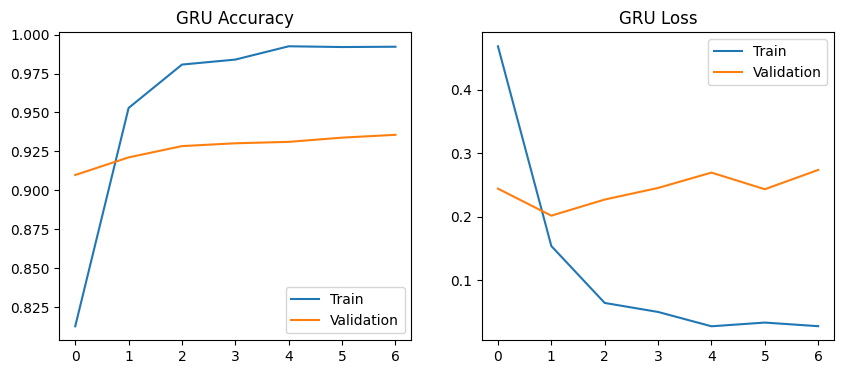

In [44]:
# =========================================
# 🔹 GRU Accuracy & Loss Curve
# =========================================

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title("GRU Accuracy")
plt.legend(['Train', 'Validation'])

plt.subplot(1,2,2)
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title("GRU Loss")
plt.legend(['Train', 'Validation'])

plt.show()


69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step


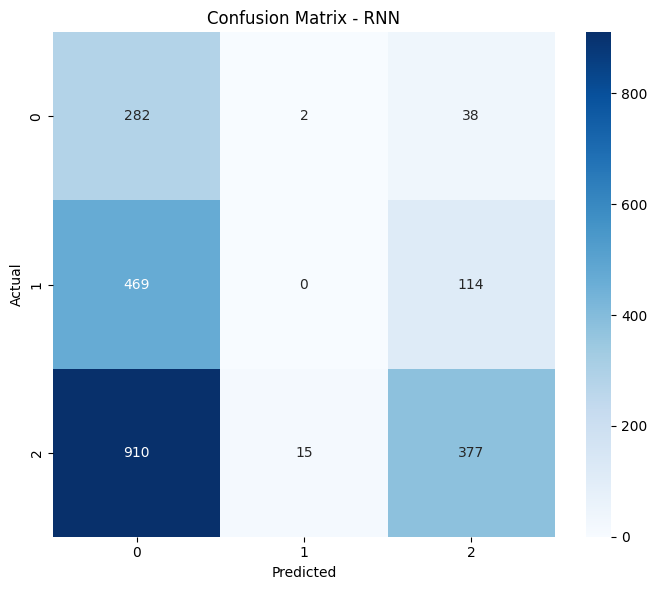

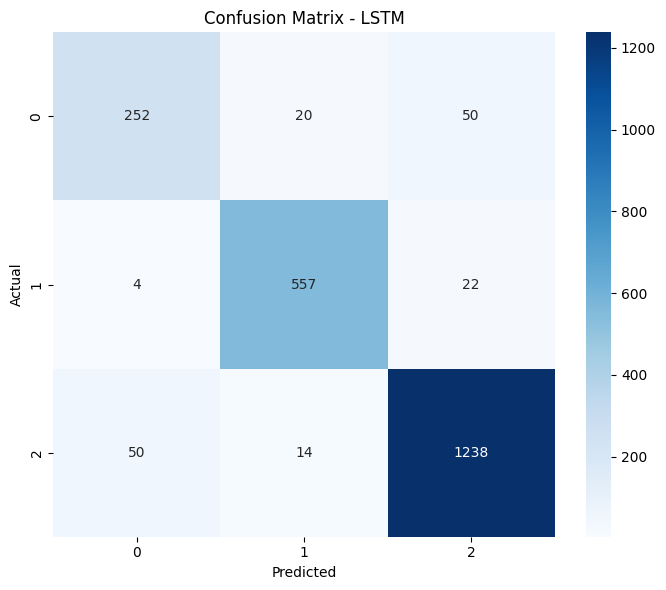

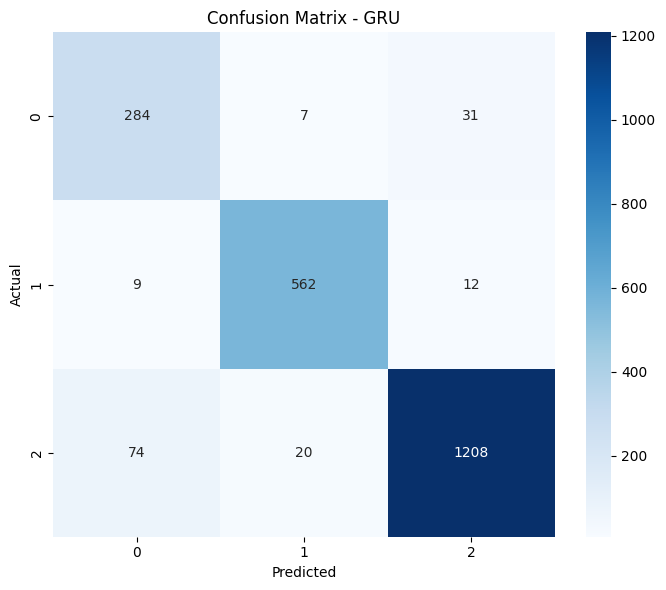

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Predictions
pred_rnn = np.argmax(model_rnn.predict(X_test), axis=1)
pred_lstm = np.argmax(model_lstm.predict(X_test), axis=1)
pred_gru = np.argmax(model_gru.predict(X_test), axis=1)

plot_conf_matrix(y_test, pred_rnn, "Confusion Matrix - RNN")
plot_conf_matrix(y_test, pred_lstm, "Confusion Matrix - LSTM")
plot_conf_matrix(y_test, pred_gru, "Confusion Matrix - GRU")


In [36]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

def get_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted"
    )
    return acc, precision, recall, f1

rnn_m = get_metrics(y_test, pred_rnn)
lstm_m = get_metrics(y_test, pred_lstm)
gru_m = get_metrics(y_test, pred_gru)
nb_m = get_metrics(y_test_nb, y_pred_nb) # Metrics for Naive Bayes
lr_m = get_metrics(y_test_lr, y_pred_lr) # Metrics for Logistic Regression

df_metrics = pd.DataFrame({
    "Model": ["RNN", "LSTM", "GRU", "Naive Bayes", "Logistic Regression"],
    "Accuracy": [rnn_m[0], lstm_m[0], gru_m[0], nb_m[0], lr_m[0]],
    "Precision": [rnn_m[1], lstm_m[1], gru_m[1], nb_m[1], lr_m[1]],
    "Recall": [rnn_m[2], lstm_m[2], gru_m[2], nb_m[2], lr_m[2]],
    "F1 Score": [rnn_m[3], lstm_m[3], gru_m[3], nb_m[3], lr_m[3]],
})

print("===== MODEL PERFORMANCE COMPARISON =====\n")
print(df_metrics)


===== MODEL PERFORMANCE COMPARISON =====

                 Model  Accuracy  Precision    Recall  F1 Score
0                  RNN  0.298595   0.445201  0.298595  0.284432
1                 LSTM  0.927503   0.926632  0.927503  0.926975
2                  GRU  0.930675   0.934617  0.930675  0.931901
3          Naive Bayes  0.802243   0.838062  0.802243  0.812119
4  Logistic Regression  0.926606   0.926540  0.926606  0.924909


In [37]:
rnn_acc = history_rnn.history['val_accuracy'][-1]
lstm_acc = history_lstm.history['val_accuracy'][-1]
gru_acc = history_gru.history['val_accuracy'][-1]

print("🔹 Final Validation Accuracy Comparison")
print(f"RNN  Accuracy : {rnn_acc:.4f}")
print(f"LSTM Accuracy : {lstm_acc:.4f}")
print(f"GRU  Accuracy : {gru_acc:.4f}")


🔹 Final Validation Accuracy Comparison
RNN  Accuracy : 0.2406
LSTM Accuracy : 0.9039
GRU  Accuracy : 0.9357


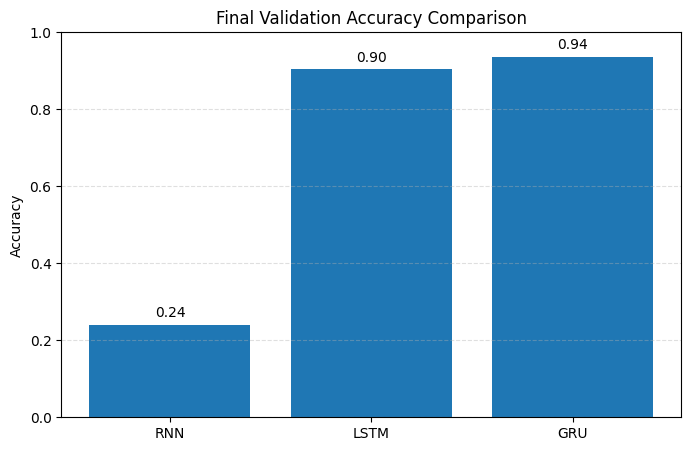

In [38]:
import matplotlib.pyplot as plt
accuracies = [rnn_acc, lstm_acc, gru_acc]
models = ['RNN', 'LSTM', 'GRU']

plt.figure(figsize=(8,5))
plt.bar(models, accuracies)
plt.title("Final Validation Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.4)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')

plt.show()


69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step


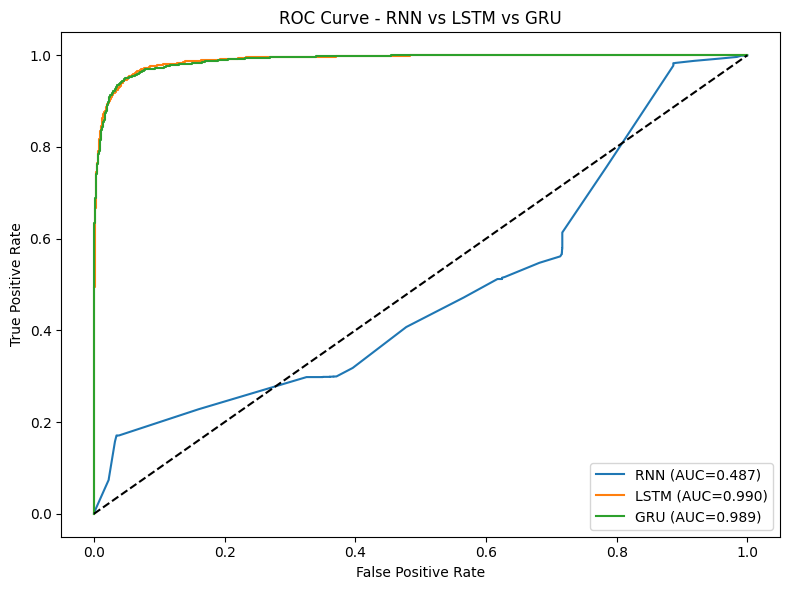

In [39]:
y_test_cat = to_categorical(y_test, num_classes=num_classes)

def plot_roc_curve(model, label_name):
    y_prob = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test_cat.ravel(), y_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label_name} (AUC={roc_auc:.3f})")

plt.figure(figsize=(8,6))
plot_roc_curve(model_rnn, "RNN")
plot_roc_curve(model_lstm, "LSTM")
plot_roc_curve(model_gru, "GRU")

plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - RNN vs LSTM vs GRU")
plt.legend()
plt.tight_layout()
plt.show()



/tmp/ipython-input-542412123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df_metrics, palette='viridis')


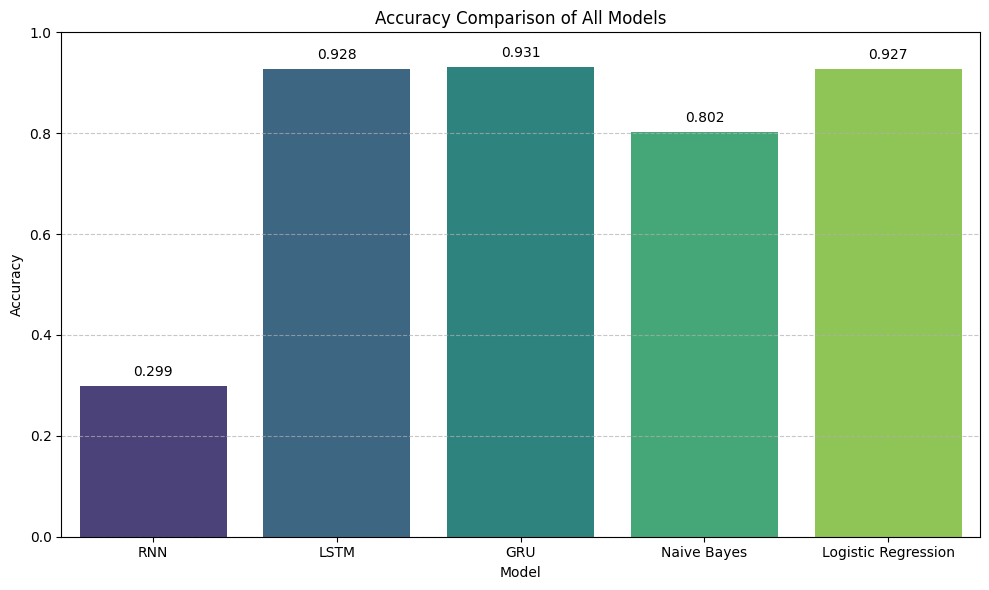

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_metrics, palette='viridis')
plt.title('Accuracy Comparison of All Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Accuracy values are between 0 and 1

for index, row in df_metrics.iterrows():
    plt.text(index, row['Accuracy'] + 0.02, f"{row['Accuracy']:.3f}", color='black', ha="center")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
def predict_sentiment(text, model):
    text = str(text).strip().lower()
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=MAX_SEQ_LEN, padding='post', truncating='post')
    pred = model.predict(padded)
    label_index = np.argmax(pred)
    return le.inverse_transform([label_index])[0]

user_text = input("Enter your text: ")
prediction = predict_sentiment(user_text, model_gru)

print("\nPredicted Sentiment:", prediction)
